In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [89]:
df_dict = pd.read_excel('data/G1_G2_GO_KEGG_Excel.xlsx', sheet_name=None)

In [90]:
df_dict.keys()

dict_keys(['Sheet 1', 'KEGG', 'GO_BP', 'GO_CC', 'GO_MF'])

In [91]:
for key in df_dict.keys():
    df_dict[key].columns = df_dict[key].loc[0, :]
    df_dict[key].drop(0, axis=0, inplace=True)

In [92]:
df_dict['KEGG']


,Category,Term,Count,%,PValue,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
1,KEGG_PATHWAY,hsa04910:Insulin signaling pathway,21,1.469559,0.00208,499,138,6879,2.097804,0.426522,0.35614,0.35614
2,KEGG_PATHWAY,hsa05014:Amyotrophic lateral sclerosis (ALS),11,0.769769,0.002658,499,50,6879,3.032826,0.508634,0.35614,0.35614
3,KEGG_PATHWAY,hsa04210:Apoptosis,12,0.839748,0.00443,499,62,6879,2.668175,0.694372,0.395729,0.395729
4,KEGG_PATHWAY,hsa04066:HIF-1 signaling pathway,15,1.049685,0.008778,499,96,6879,2.153995,0.905031,0.522103,0.522103
5,KEGG_PATHWAY,hsa05100:Bacterial invasion of epithelial cells,13,0.909727,0.009741,499,78,6879,2.297595,0.926724,0.522103,0.522103
6,KEGG_PATHWAY,hsa04510:Focal adhesion,24,NaN,0.024154,499,206,6879,1.606086,0.998538,0.968929,0.968929
7,KEGG_PATHWAY,hsa03410:Base excision repair,7,0.489853,0.028956,499,33,6879,2.924212,0.999608,0.968929,0.968929
8,KEGG_PATHWAY,hsa04962:Vasopressin-regulated water reabsorption,8,0.559832,0.036984,499,44,6879,2.506467,0.999957,0.968929,0.968929
9,KEGG_PATHWAY,hsa05222:Small cell lung cancer,12,0.839748,0.041802,499,85,6879,1.946198,0.999989,0.968929,0.968929
10,KEGG_PATHWAY,hsa00524:Butirosin and neomycin biosynthesis,3,0.209937,0.045165,499,5,6879,8.271343,0.999996,0.968929,0.968929


In [93]:
def barplot(sheet='KEGG', topN=15, cmap='RdPu', sortby='PValue'):
    df = df_dict[sheet].loc[:topN, :]
    minpvalue = df.iloc[0, :]['PValue']
    maxpvalue = df.iloc[-1, :]['PValue']

    fig, ax = plt.subplots(figsize=(12, 12))
    cmap = plt.get_cmap(cmap)
    df_plotting = df.sort_values(sortby)
    ax.barh(df_plotting['Term'], df_plotting['Count'], color=[cmap(x) for x in (
        df_plotting['PValue'] - minpvalue)/((maxpvalue - minpvalue)*2) + 0.5])

    ax.set_xlabel('Count')
    ax.set_ylabel('Term')
    return fig, ax


(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:xlabel='Count', ylabel='Term'>)

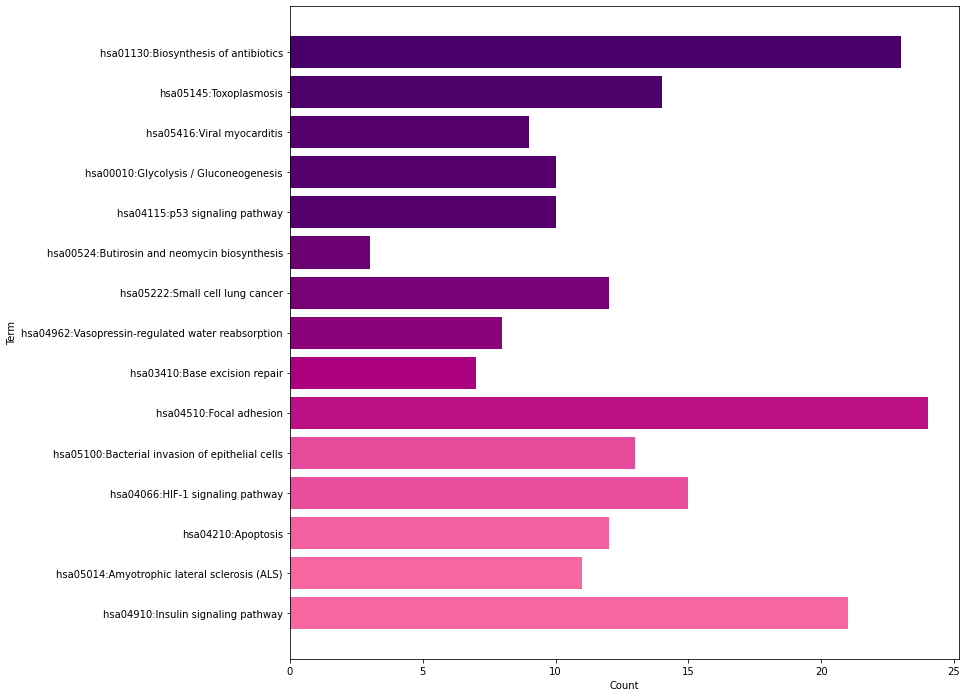

In [94]:
barplot(sheet='KEGG', topN=15, cmap='RdPu', sortby='PValue')


In [97]:
def dotplot(sheet='KEGG', topN=15, cmap='RdPu', sortby='PValue'):
    df = df_dict[sheet].loc[:topN, :]
    minpvalue = df.iloc[0, :]['PValue']
    maxpvalue = df.iloc[-1, :]['PValue']

    df['Count'] = df['Count'].fillna(0)
    mincount = np.min(df['Count'])
    maxcount = np.max(df['Count'])

    fig, ax = plt.subplots(figsize=(12, 12))
    cmap = plt.get_cmap(cmap)
    df_plotting = df.sort_values(sortby)
    ax.scatter(df_plotting['%'], df_plotting.index, s=(df_plotting['Count'] - mincount)/((maxcount - mincount))*300+2,
        c=[cmap(x) for x in (df_plotting['PValue'] - minpvalue)/((maxpvalue - minpvalue)*2) + 0.5])

    ax.set_ylabel('Term')
    ax.set_xlabel('Percentage')
    ax.set_yticks(df_plotting.index)
    ax.set_yticklabels(df_plotting['Term'])

    return fig, ax


<ipython-input-97-8efad2946f34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Count'] = df['Count'].fillna(0)


(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:xlabel='Percentage', ylabel='Term'>)

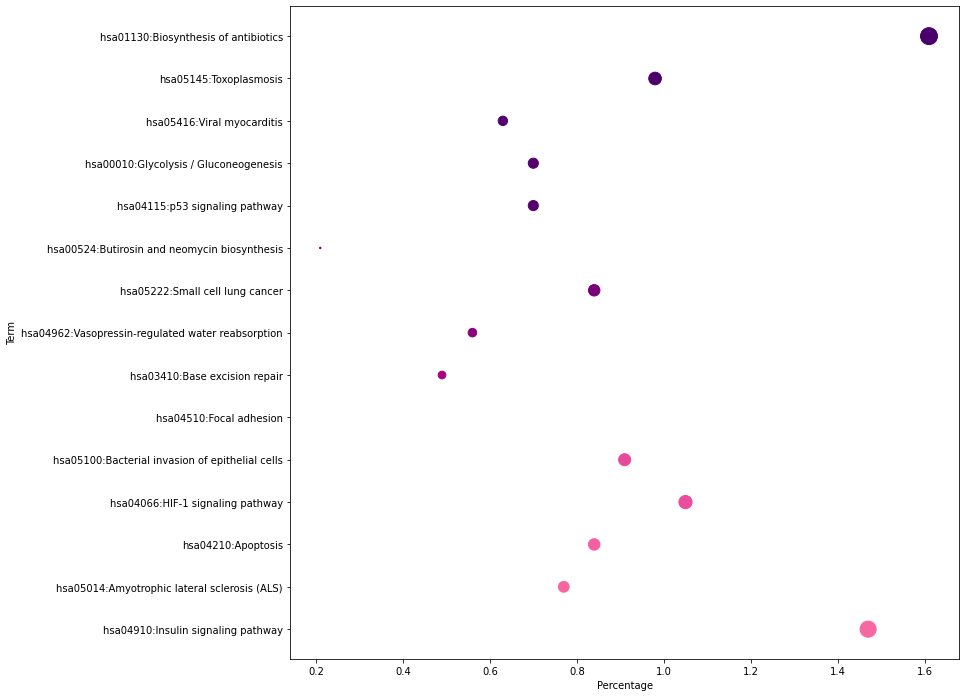

In [98]:
dotplot(sheet='KEGG', topN=15, cmap='RdPu', sortby='PValue')